In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Lambda, SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("/content/sales_data.csv")
df.head()

,Date,Sales
0,2013-01-01,48.40
1,2013-01-02,49.63
2,2013-01-03,44.66
3,2013-01-04,56.70
4,2013-01-05,62.87


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace=True)

In [4]:
data = df['Sales'].values

In [5]:
data[20]

49.38

In [6]:
window_size = 20
X, y = [],[]

for i in range(window_size, len(data)):
  X.append(data[i-window_size:i])
  y.append(data[i])

In [7]:
X = np.array(X)
y = np.array(y)

train_size = int(len(X)*0.8)

X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [8]:
y_train.shape

(2906,)

In [9]:
batch_size = 128
buffer_size = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
# cache() method to speed up training by caching our dataset in memory.
# shuffle(buffer_size)method to randomly shuffle our training data to prevent issues such as sequential bias.
# batch(batch_size) method to split our data into batches of a specified size; in this case, batches of 128
# prefetch method to ensure our GPU/CPU will always have data ready for processing,
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


# In built learning rate scheduler

In [10]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(window_size,)),
    Dense(10, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Exponential decay learning rate scheduler

In [11]:
lr_exp = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1, decay_steps=100, decay_rate=0.96)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_exp)

In [12]:
model.compile(optimizer= optimizer, loss='mae')
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 27.7672
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2478
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6382
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4538
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2527
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8139
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9098
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4857
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6441
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9666
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1219
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.5269
Epoch 13/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3349
Epoch 14/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1091
Epoch 15/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1420
Epo

In [13]:
forecast = model.predict(X_val)

mae_exp = tf.keras.metrics.mae(y_val, forecast)
mse_exp = tf.keras.metrics.mse(y_val, forecast)
mae_exp, mse_exp

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(<tf.Tensor: shape=(727,), dtype=float32, numpy=
 array([2.44773865e+00, 6.01364136e+00, 1.26864624e+00, 4.87747192e-02,
        3.78904724e+00, 8.06121826e-01, 2.37024689e+00, 6.21678162e+00,
        4.75432587e+00, 6.52201080e+00, 1.62670898e+00, 2.92858887e+00,
        3.59499359e+00, 6.41767883e+00, 4.62218475e+00, 4.71099091e+00,
        4.55850220e+00, 2.94058990e+00, 3.81251526e+00, 1.28496552e+00,
        3.19448853e+00, 3.31321716e+00, 1.24634552e+00, 5.22373962e+00,
        6.47599792e+00, 1.00703278e+01, 2.84936523e+00, 4.40827179e+00,
        7.54547119e-01, 3.49129486e+00, 7.60398865e-01, 3.20312500e-01,
        4.42718506e-01, 3.71689606e+00, 7.41307831e+00, 6.48887634e-01,
        6.00213623e+00, 3.25359344e+00, 2.53157806e+00, 4.27292633e+00,
        2.13208008e+00, 7.90335083e+00, 1.61074829e+00, 8.48166656e+00,
        2.80500793e+00, 7.26656342e+00, 2.76140594e+00, 7.22866058e+00,
        2.18424988e+00, 2.65696716e+00, 5.19614410e+00, 2.39564514e+00,
        6.51116

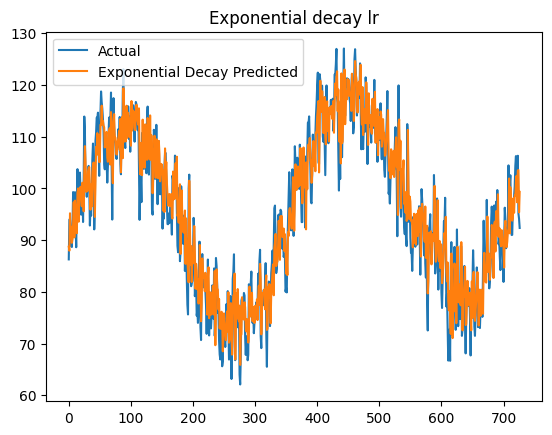

In [14]:
plt.plot(y_val , label='Actual')
plt.plot(forecast, label='Exponential Decay Predicted')
plt.title('Exponential decay lr')
plt.legend()
plt.show()

Piecewise constant decay

In [15]:
lr_piecewise = tf.keras.optimizers.schedules.PiecewiseConstantDecay([30,60],[0.1,0.001,0.0001])
optimizer = tf.keras.optimizers.Adam(learning_rate = lr_piecewise)

In [16]:
model.compile(loss='mse', optimizer=optimizer)
history_piecewise = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 301.6571
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.5298
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3492
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.8337
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3074
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.5759
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.7419
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.2665
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.7074
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3702
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.4678
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.8858
Epoch 13/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.6306
Epoch 14/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.9470
Epoch 15/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [17]:
forecast_piecewise = model.predict(X_val)

print(tf.keras.metrics.mse(y_val,forecast_piecewise).numpy())
print(tf.keras.metrics.mae(y_val,forecast_piecewise).numpy())

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[3.95902872e+00 4.06093102e+01 1.51576295e-01 9.87344980e-01
 6.35926867e+00 1.72522068e-02 9.77435303e+00 5.56059494e+01
 7.90093231e+00 5.03940544e+01 1.21798191e+01 2.32351255e+00
 7.68353653e+00 5.05157700e+01 4.45780754e+01 7.15629435e+00
 2.84571686e+01 2.23153744e+01 3.01400757e+01 2.77520418e-01
 3.45370150e+00 1.84274197e+01 2.80963421e-01 1.55181484e+01
 5.09025955e+01 1.47543945e+02 3.03775291e+01 6.19078445e+00
 2.62285185e+00 4.75053883e+00 2.65711498e+00 1.61839974e+00
 4.02478790e+00 5.26211500e+00 4.48608284e+01 4.95941669e-01
 2.53428116e+01 1.18607702e+01 1.61033154e+01 3.52913322e+01
 2.48248324e-01 5.31559067e+01 1.82303154e+00 9.00027237e+01
 2.53337479e+01 8.18782501e+01 2.78348179e+01 8.21903152e+01
 1.13387275e-02 1.91025078e+00 4.19370651e+01 2.42760258e+01
 7.90395508e+01 1.30298462e+01 2.52684326e+01 5.76784706e+00
 5.67627132e-01 2.97549648e+01 1.15377131e+01 1.23189807e+00
 1.12428948e-01 2.24359112e+01 2.10773830e+01 

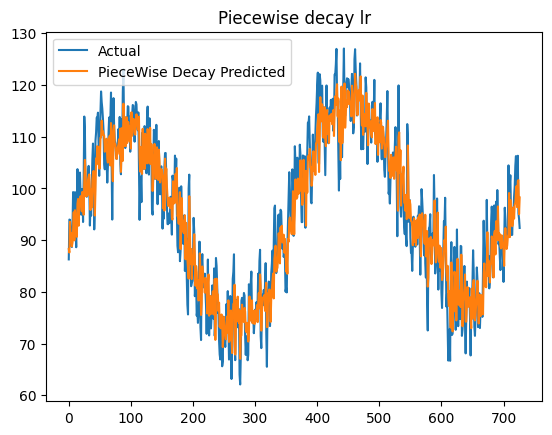

In [18]:
plt.plot(y_val , label='Actual')
plt.plot(forecast_piecewise, label='PieceWise Decay Predicted')
plt.title('Piecewise decay lr')
plt.legend()
plt.show()

Polynomial Decay

In [19]:
lr_poly = tf.keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=0.1, decay_steps=100, end_learning_rate=0.0001, power=1.0)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_poly)

In [20]:
model.compile(loss='mae', optimizer=optimizer)
history_poly = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.6669
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4842
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4491
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2118
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2743
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2348
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3031
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1606
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3035
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.2843
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3014
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3240
Epoch 13/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2969
Epoch 14/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4170
Epoch 15/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3263
Epoc

In [21]:
forecast_poly = model.predict(X_val)

print(tf.keras.metrics.mse(y_val,forecast_poly).numpy())
print(tf.keras.metrics.mae(y_val,forecast_poly).numpy())

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[3.67254853e+00 4.29454269e+01 2.00005591e-01 9.46327329e-01
 7.26512098e+00 5.21113537e-02 9.73275089e+00 5.49751091e+01
 8.97625732e+00 5.03110085e+01 1.15482883e+01 2.72159863e+00
 8.24383640e+00 4.94819374e+01 4.17780266e+01 8.53280640e+00
 2.73121700e+01 2.05219250e+01 2.76513309e+01 6.03482835e-02
 4.38270283e+00 1.72748585e+01 9.60748345e-02 1.71295528e+01
 4.96354408e+01 1.42747910e+02 2.70507603e+01 7.69220972e+00
 2.06388450e+00 5.41647196e+00 2.42612386e+00 1.17560112e+00
 3.36559772e+00 5.52550554e+00 4.45336685e+01 6.65012658e-01
 2.43850098e+01 1.34265842e+01 1.65760155e+01 3.39898987e+01
 3.50512564e-01 5.14663277e+01 2.61420965e+00 9.33290863e+01
 2.59427910e+01 8.28237228e+01 2.59859428e+01 7.77802811e+01
 3.37234773e-02 2.47600317e+00 4.00014381e+01 2.13369541e+01
 7.19772415e+01 9.44852257e+00 2.08505325e+01 4.06631279e+00
 1.68885931e-01 3.30225906e+01 1.23278284e+01 1.40635371e+00
 3.16112079e-02 2.36230907e+01 1.95874729e+01 

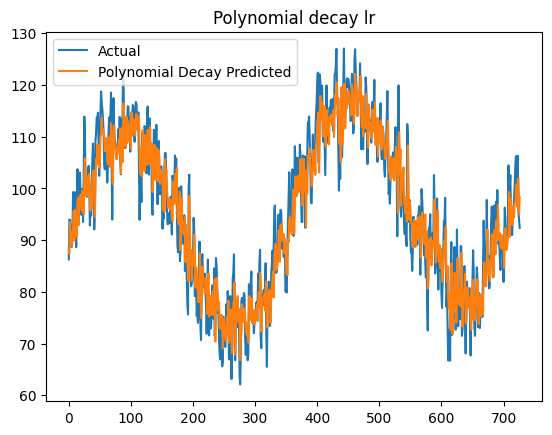

In [22]:
plt.plot(y_val , label='Actual')
plt.plot(forecast_poly, label='Polynomial Decay Predicted')
plt.title('Polynomial decay lr')
plt.legend()
plt.show()

# Custom Learning Rate Scheduler

In [23]:
# define custom scheduler | start with small learning rate and increasing by 10**(epoch/10)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.00000001*10**(epoch/10))

#define optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.00000001, momentum=0.90)

In [24]:
model.compile(loss='mae', optimizer=optimizer)
history_custom = model.fit(X_train, y_train, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.2001 - learning_rate: 1.0000e-08
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2523 - learning_rate: 1.2589e-08
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2614 - learning_rate: 1.5849e-08
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2817 - learning_rate: 1.9953e-08
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3314 - learning_rate: 2.5119e-08
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1526 - learning_rate: 3.1623e-08
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3436 - learning_rate: 3.9811e-08
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3021 - learning_rate: 5.0119e-08
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2423 - learning_rate: 6.3096e-08
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2472 - learning_rate: 7.9433e-08
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

# CNN for time series forecasting

In [25]:
# CNN takes 3D input | Here we will have (batch_size, window_size, 1(for univariate))
window_size = 20
X=[]
y=[]
for i in range(window_size, len(data)):
  X.append(data[i-window_size:i])
  y.append(data[i])

X = np.array(X)
y = np.array(y)

In [26]:
#splitting the data
split = int(len(X)*0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

In [27]:
#reshaping
X_train = X_train.reshape(-1,window_size, 1)
X_val = X_val.reshape(-1,window_size, 1)

In [28]:
# creating windowed data using tensor dataset
batch_size = 128
shuffle_buffer = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.cache().batch(batch_size).shuffle(shuffle_buffer)

In [29]:
# build model
model = Sequential([
    Conv1D(64, kernel_size=3, input_shape=(window_size,1), activation='relu', strides=1, padding= 'causal'),
    MaxPooling1D(2),
    Conv1D(32, kernel_size=3, strides=1, padding='causal', activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(loss='mae', optimizer = 'adam')

history = model.fit(train_data, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 65.4907
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.2050
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0140
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1502
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0477
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2423
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.1418
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9405
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.0189
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0564
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0099
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.9961
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.3763
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.0423
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7457
Epoc

In [30]:
# Make predictions
preds = model.predict(X_val)
# Calculate metrics
mae = mean_absolute_error(y_val, preds)
mse = mean_squared_error(y_val, preds)
# Print metrics
print('MAE: ', mae)
print('MSE: ', mse)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MAE:  4.9401014463904795
MSE:  37.76657047796911


# RNN in Time series forecasting

In [31]:
window_size = 20
X, y =[], []

for i in range(window_size,len(data)):
  X.append(data[i-window_size:i])
  y.append(data[i])

X = np.array(X)
y = np.array(y)

In [32]:
split = int(len(X)*0.8)

X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

In [33]:
batch_size= 128
shuffle_buffer = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.cache().batch(batch_size).shuffle(shuffle_buffer)

In [34]:
model_rnn = Sequential([
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    SimpleRNN(40, return_sequences=True),
    SimpleRNN(40),
    Dense(1),
    Lambda(lambda x: x*100.0)
])

model_rnn.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=8e-4))

history_rnn = model_rnn.fit(train_data, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 35.0509
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.0410
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.4747
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.5334
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8728
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.0943
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.1839
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3612
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.7948
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5818
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2407
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8758
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8024
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6061
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.304

In [35]:
pred_rnn = model_rnn.predict(X_val)

mae = mean_absolute_error(y_val, pred_rnn)
mse = mean_squared_error(y_val, pred_rnn)

mae, mse

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


(4.674167153044941, 34.011004939587636)

# LSTM in time series forecasting

In [36]:
window_size = 20
X , y = [] , []

for i in range(window_size, len(data)):
  X.append(data[i-window_size:i])
  y.append(data[i])

X = np.array(X)
X = X.reshape(X.shape[0],X.shape[1], 1)
y = np.array(y)

In [37]:
split = int(0.8*len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

In [38]:
batch_size = 64
buffer_size = 1000

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size).batch(batch_size)

In [39]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=[None,1]),
    LSTM(50),
    Dense(1)
])

model_lstm.compile(loss='mae', optimizer='adam')

history = model_lstm.fit(dataset, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 62.1284
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 54.1974
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 50.4500
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 47.8031
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 45.8482
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 43.0712
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 40.7075
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 37.8251
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 35.6681
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 33.4268
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 30.6440
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 29.1149
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 26.8379
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 24.7790
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - 

In [40]:
pred_lstm = model_lstm.predict(X_val)

mae_lstm = mean_absolute_error(y_val, pred_lstm)
mse_lstm = mean_squared_error(y_val, pred_lstm)

mae_lstm, mse_lstm

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


(5.842251193165943, 56.83369492413544)